# Benchmarks analysis - Asymmetry

This notebook aims to assess our model's performances on two synthetic benchkmarks of abnormalities:
- deletion benchmark: simple surfaces of various sizes have been randomly deleted
- asymmetry benchmark: equivalent crop but on left hemisphere and then flipped

In [4]:
import os
import sys
import json
import re
import pandas as pd
from tqdm import tqdm
from soma import aims
import random

p = os.path.abspath('../')
if p not in sys.path:
    sys.path.append(p)
    
q = os.path.abspath('../../')
if q not in sys.path:
    sys.path.append(q)
    
from vae import *
from preprocess import SkeletonDataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dico_toolbox as dtx
import umap
from scipy.spatial import distance
from scipy.interpolate import interp1d
from scipy.stats import mannwhitneyu, ttest_ind, ks_2samp

from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import LinearSVC

In [5]:
if torch.cuda.is_available():
    device = "cuda:0"

In [6]:
model_dir = '/neurospin/dico/lguillon/distmap/gridsearch_lr5e-4/n_75_kl_2/checkpoint.pt'
model_vae = VAE((1, 80, 80, 96), 75, depth=3)
model_vae.load_state_dict(torch.load(model_dir))
model_vae = model_vae.to(device)

In [7]:
data_dir = "/neurospin/dico/lguillon/distmap/analyses_gridsearch/75_2/"
df_encoded_hcp = pd.read_pickle(os.path.join(data_dir, "encoded_hcp.pkl"))

## Benchmark Asymmetry

In [8]:
data_dir = '/neurospin/dico/lguillon/distmap/benchmark/asymmetry/'

In [9]:
distmaps_asym = np.load(os.path.join(data_dir, "asym_benchmark_1mm.npy"),
                   mmap_mode='r')
filenames_asym = np.load(os.path.join(data_dir, "sub_id.npy"))

subset_asym = SkeletonDataset(dataframe=distmaps_asym,
                         filenames=filenames_asym,
                         data_transforms=False)
loader_asym = torch.utils.data.DataLoader(
               subset_asym,
               batch_size=1,
               num_workers=1,
               shuffle=False)

In [11]:
dico_set_loaders = {'asymmetry': loader_asym}

root_dir = '/neurospin/dico/lguillon/distmap/benchmark/results/'

criterion = nn.MSELoss(reduction='sum')
tester_asym = ModelTester(model=model_vae, dico_set_loaders=dico_set_loaders,
                     loss_func=criterion, kl_weight=2,
                     n_latent=75, depth=3)

results_asym = tester_asym.test()
encoded_asym = {loader_name:[results_asym[loader_name][k][1] for k in results_asym[loader_name].keys()] for loader_name in dico_set_loaders.keys()}
losses_asym = {loader_name:[int(results_asym[loader_name][k][0].cpu().detach().numpy()) for k in results_asym[loader_name].keys()] for loader_name in dico_set_loaders.keys()}
recon_asym = {loader_name:[int(results_asym[loader_name][k][2].cpu().detach().numpy()) for k in results_asym[loader_name].keys()] for loader_name in dico_set_loaders.keys()}
input_asym = {loader_name:[results_asym[loader_name][k][3].cpu().detach().numpy() for k in results_asym[loader_name].keys()] for loader_name in dico_set_loaders.keys()}
var_asym = {loader_name:[results_asym[loader_name][k][4] for k in results_asym[loader_name].keys()] for loader_name in dico_set_loaders.keys()}

asymmetry
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 7.4386597e-05 8.0347061e-05 ... 9.9866486e-01 9.9900138e-01
 9.9985051e-01]
[0.0000000e+00 6.6757202e-06 9.7751617e-06 ... 9.9760747e-01 9.9883580e-01
 9.9907076e-01]
[0.0000000e+00 9.0599060e-05 9.3936920e-05 ... 9.9952471e-01 9.9961555e-01
 9.9994659e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 8.5592270e-05 1.1754036e-04 ... 9.9909747e-01 9.9942851e-01
 9.9964750e-01]
[0.0000000e+00 4.2200089e-05 4.6730042e-05 ... 9.9815214e-01 9.9831235e-01
 9.9921489e-01]
[0.000000e+00 7.057190e-05 7.081032e-05 ... 9.992684e-01 9.994339e-01
 9.994767e-01]
(78, 63, 88, 1)
(78, 63,

ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 2.5272369e-05 2.7656555e-05 ... 9.9935377e-01 9.9943388e-01
 9.9966812e-01]
(78, 63, 88)
[0.0000000e+00 3.8146973e-05 5.7458878e-05 ... 9.9945188e-01 9.9957812e-01
 9.9969029e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 2.6226044e-05 3.1709671e-05 ... 9.9903119e-01 9.9969327e-01
 9.9984515e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.3780594e-04 1.4638901e-04 ... 9.9881971e-01 9.9953532e-01
 9.9973822e-01]
ici
(1, 78, 63, 88, 1)
[0.0000000e+00 3.6001205e-05 3.6478043e-05 ... 9.9924159e-01 9.9971163e-01
 9.9986112e-01]
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 1.0776520e-04 1.1968613e-04 ... 9.9964750e-01 9.9969339e-01
 9.9977577e-01]
(78, 63, 88)

(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 3.8623810e-05 4.0769577e-05 ... 9.9884641e-01 9.9897456e-01
 9.9960482e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.5211105e-04 1.5807152e-04 ... 9.9894261e-01 9.9963570e-01
 9.9971688e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 8.4638596e-05 8.5115433e-05 ... 9.9892116e-01 9.9920964e-01
 9.9924159e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 4.5073032e-04 4.5239925e-04 ... 9.9955142e-01 9.9957275e-01
 9.9970090e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 8.5830688e-06 1.1444092e-05 ... 9.9914551e-01 9.9921489e-01
 9.9988246e-01]
(78, 63, 88)
[0.0000000e+00 1.1920929e-05 1.2397766e-05 ... 9.9941254e-01 9.9944460e-01
 9.9989319e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.

(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.9073486e-05 1.9788742e-05 ... 9.9876094e-01 9.9900663e-01
 9.9901736e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.9717216e-04 1.9764900e-04 ... 9.9939120e-01 9.9987721e-01
 9.9991453e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 2.0623207e-04 2.1457672e-04 ... 9.9910271e-01 9.9936986e-01
 9.9986112e-01]
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 8.3208084e-05 1.1801720e-04 ... 9.9932706e-01 9.9940205e-01
 9.9991453e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 2.0337105e-04 2.2006035e-04 ... 9.9849403e-01 9.9947667e-01
 9.9951935e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 3.1232834e-05 4.5537949e-05 ... 9.9849927e-01 9.9870765e-01
 9.9965823e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)

In [214]:
df_encoded_asym = pd.DataFrame()
df_encoded_asym['latent'] = encoded_asym['asymmetry']
df_encoded_asym['loss'] = losses_asym['asymmetry']  
df_encoded_asym['recon'] = recon_asym['asymmetry']   
df_encoded_asym['input'] = input_asym['asymmetry'] 
df_encoded_asym['sub'] = list(filenames_asym) 

## D_{L} computation

#### Train data

In [13]:
data_dir = '/neurospin/dico/lguillon/distmap/data/'
filenames_all = np.load(os.path.join(data_dir,
                                "train_sub_id.npy"))
distmaps = np.load(os.path.join(data_dir,
                                "train_distmap.npy"),
                       mmap_mode='r')

subset_sc = SkeletonDataset(dataframe=distmaps, filenames=filenames_all, data_transforms=False)
sc_loader = torch.utils.data.DataLoader(
                          subset_sc,
                          batch_size=8,
                          num_workers=8,
                          shuffle=False)

criterion = nn.MSELoss(reduction='sum')
tester_hcp = ModelTester(model=model_vae, dico_set_loaders={'hcp_train': sc_loader},
                     loss_func=criterion, kl_weight=2,
                     n_latent=75, depth=3)

results_hcp = tester_hcp.test()
encoded_hcp_all = {loader_name:[results_hcp[loader_name][k][1] for k in results_hcp[loader_name].keys()] for loader_name in {'hcp_train': sc_loader}.keys()}
losses_hcp_all = {loader_name:[int(results_hcp[loader_name][k][0].cpu().detach().numpy()) for k in results_hcp[loader_name].keys()] for loader_name in {'hcp_train': sc_loader}.keys()}
recon_hcp_all = {loader_name:[int(results_hcp[loader_name][k][2].cpu().detach().numpy()) for k in results_hcp[loader_name].keys()] for loader_name in {'hcp_train': sc_loader}.keys()}
input_hcp_all = {loader_name:[results_hcp[loader_name][k][3].cpu().detach().numpy() for k in results_hcp[loader_name].keys()] for loader_name in {'hcp_train': sc_loader}.keys()}
var_hcp_all = {loader_name:[results_hcp[loader_name][k][4] for k in results_hcp[loader_name].keys()] for loader_name in {'hcp_train': sc_loader}.keys()}

df_encoded_hcp_all = pd.DataFrame()
df_encoded_hcp_all['latent'] = encoded_hcp_all['hcp_train']
df_encoded_hcp_all['loss'] = losses_hcp_all['hcp_train']
df_encoded_hcp_all['recon'] = recon_hcp_all['hcp_train']
df_encoded_hcp_all['input'] = input_hcp_all['hcp_train']
df_encoded_hcp_all['var'] = var_hcp_all['hcp_train']
df_encoded_hcp_all['Group'] = ['hcp_train' for k in range(len(filenames_all))] 
df_encoded_hcp_all['sub'] = list(filenames_all)

hcp_train
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(7

(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
[0.0000000e+00 8.8214874e-06 1.4066696e-05 ... 9.9992526e-01 9.9993587e-01
 9.9996793e-01]
[0.0000000e+00 4.2915344e-05 4.50611

ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 

(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
[0.00000000e+00 1.50203705e-05 1.62124634e-05 ... 9.99871850e-01
 9.99882460e-01 9.99935865e-01]
[0.0000000e+00 2.1457672e-06 3.0994415e-06 ... 9.9982381e-01 9.9986112e-01
 9.9990916e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 

(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
[0.0000000e+00 8.5830688e-06 1.0251999e-05 ... 9.9988854e-01 9.9990392e-01
 9.9999464e-01]
[0.00000000e+00 6.19888306e-06 1.04904175e-05 ... 9.99887228e-01
 9.99946594e-01 9.99978662e-01]
[0.0000000e+00 3.8862228e-05 4.4107437e-05 ... 9.9981844e-01 9.9983442e-01
 9.9988246e-01]
i

(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 

(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.5258789e-05 2.0027161e-05 ... 9.9986112e-01 9.9994123e-01
 9.9996793e-01]
[0.0000000e+00 5.9604645e-06 7.1525574e-06 ... 9.9978638e-01 9.9982917e-01
 9.9995720e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63

(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
(78, 63, 88)
[0.0000000e+00 2.4557114e-05 3.0755997e-05 ... 9.9981844e-01 9.9982381e-01
 9.9983442e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.6212463e-05 2.0503998e-05 ... 9.9996257e-01 9.9996793e-01
 9.9998927e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.5974045e-05 1.8596649e-05 ... 9.9979711e-01

#### Test data

In [14]:
subject_dir = "/neurospin/dico/lguillon/distmap/data/"
data_dir = "/neurospin/dico/lguillon/distmap/data/"
test_list = pd.read_csv(os.path.join(subject_dir, "test_list.csv"))
distmaps = np.load(os.path.join(data_dir, "test_distmap.npy"),
                   mmap_mode='r')
filenames = np.load(os.path.join(data_dir, "test_sub_id.npy"))
print(distmaps.shape, filenames.shape)

subset = SkeletonDataset(dataframe=distmaps,
                         filenames=filenames,
                         data_transforms=False)
testloader = torch.utils.data.DataLoader(
               subset,
               batch_size=1,
               num_workers=1,
               shuffle=False)

dico_set_loaders_hcp = {'hcp': testloader}

root_dir = '/neurospin/dico/lguillon/distmap/analyses_gridsearch/'

criterion = nn.MSELoss(reduction='sum')
tester_hcp = ModelTester(model=model_vae, dico_set_loaders=dico_set_loaders_hcp,
                     loss_func=criterion, kl_weight=2,
                     n_latent=75, depth=3)

results_hcp = tester_hcp.test()
encoded_hcp = {loader_name:[results_hcp[loader_name][k][1] for k in results_hcp[loader_name].keys()] for loader_name in dico_set_loaders_hcp.keys()}
losses_hcp = {loader_name:[int(results_hcp[loader_name][k][0].cpu().detach().numpy()) for k in results_hcp[loader_name].keys()] for loader_name in dico_set_loaders_hcp.keys()}
recon_hcp = {loader_name:[int(results_hcp[loader_name][k][2].cpu().detach().numpy()) for k in results_hcp[loader_name].keys()] for loader_name in dico_set_loaders_hcp.keys()}
input_hcp = {loader_name:[results_hcp[loader_name][k][3].cpu().detach().numpy() for k in results_hcp[loader_name].keys()] for loader_name in dico_set_loaders_hcp.keys()}
var_hcp = {loader_name:[results_hcp[loader_name][k][4] for k in results_hcp[loader_name].keys()] for loader_name in dico_set_loaders_hcp.keys()}

df_encoded_hcp = pd.DataFrame()
df_encoded_hcp['latent'] = encoded_hcp['hcp']
df_encoded_hcp['loss'] = losses_hcp['hcp']
df_encoded_hcp['recon'] = recon_hcp['hcp']
df_encoded_hcp['input'] = input_hcp['hcp']
df_encoded_hcp['var'] = var_hcp['hcp']
df_encoded_hcp['Group'] = ['hcp' for k in range(len(filenames))]
df_encoded_hcp['sub'] = list(filenames)

(200, 78, 63, 88, 1) (200,)
hcp
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 2.8610229e-06 5.2452087e-06 ... 9.9908316e-01 9.9935913e-01
 9.9955142e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.6450882e-05 1.6689301e-05 ... 9.9897456e-01 9.9975324e-01
 9.9990916e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.7642975e-05 2.4557114e-05 ... 9.9955142e-01 9.9978638e-01
 9.9981844e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.000000e+00 9.083748e-05 9.703636e-05 ... 9.985260e-01 9.986541e-01
 9.996475e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 7.6055527e-05 9.8228455e-05 ... 9.9942851e-01 9.9949801e-01
 9.9971688e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.4615059e-04 1.6379356e-04 ... 9.9816823e-01 9.9860609e-01
 9.9962616e-01]
(7

(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.8930435e-04 1.9669533e-04 ... 9.9945009e-01 9.9981844e-01
 9.9992430e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 2.1672249e-04 2.3865700e-04 ... 9.9953008e-01 9.9961019e-01
 9.9998927e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 4.2676926e-05 6.4373016e-05 ... 9.9908841e-01 9.9947536e-01
 9.9996257e-01]
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.00000000e+00 1.14917755e-04 1.35660172e-04 ... 9.99967933e-01
 9.99973297e-01 9.99989271e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.00000000e+00 1.09195709e-04 1.20162964e-04 ... 9.97842431e-01
 9.98130798e-01 9.98269677e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 5.0067902e-06 6.1988831e-06 ... 9.9937522e-01 9.9970090e-01
 9.9987185e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.

(78, 63, 88)
[0.000000e+00 7.081032e-05 9.369850e-05 ... 9.992043e-01 9.993484e-01
 9.995835e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 1.2040138e-04 1.2135506e-04 ... 9.9920428e-01 9.9935913e-01
 9.9967420e-01]
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 5.4597855e-05 6.1035156e-05 ... 9.9947667e-01 9.9948728e-01
 9.9949801e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 3.9339066e-05 4.1723251e-05 ... 9.9856639e-01 9.9872887e-01
 9.9962616e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 1.5497208e-05 1.7642975e-05 ... 9.9912417e-01 9.9927366e-01
 9.9957907e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 2.4127960e-04 2.4199486e-04 ... 9.9941254e-01 9.9962616e-01
 9.9975431e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.00000000e+00 1.21593475e-04 1.80244446e-04 ... 9.99412537e-01
 9.99492645e-01 9.997

(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 5.7458878e-05 6.6757202e-05 ... 9.9912417e-01 9.9919891e-01
 9.9953008e-01]
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
[0.00000000e+00 1.01566315e-04 1.20878220e-04 ... 9.99519348e-01
 9.99551415e-01 9.99786377e-01]
(78, 63, 88, 1)
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 2.2697449e-04 2.2721291e-04 ... 9.9948728e-01 9.9965823e-01
 9.9982917e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 3.3855438e-05 4.1961670e-05 ... 9.9848330e-01 9.9868631e-01
 9.9904704e-01]
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
[0.0000000e+00 2.0265579e-05 2.0742416e-05 ... 9.9959409e-01 9.9971163e-01
 9.9976504e-01]
(78, 63, 88)
ici
(1, 78, 63, 88, 1)
(78, 63, 88)
(78, 63, 88, 1)
(78, 63, 88)
[0.0000000e+00 9.3460083e-05 9.5129013e-05 ... 9.9902391e-01 9.9915707e-01
 9.9951935e-01]
[0.0000000e+00 1.6927719e-05 2.0503998e-05 ..

In [15]:
def dev(latent_sub, var_sub):
    """
    """
    n = len(latent_sub)
    mean_ctrl = [np.mean([encoded_hcp_all['hcp_train'][k][i] for k in range(801)]) for i in range(n)]
    var_ctrl =  [np.var([encoded_hcp_all['hcp_train'][k][i] for k in range(801)]) for i in range(75)]
    deviations = []
    
    for k in range(n):
        deviations.append(abs(latent_sub[k] - mean_ctrl[k])/np.sqrt(var_ctrl[k]+var_sub[k]))
    return(np.mean(deviations))

In [16]:
dev_test = [dev(encoded_hcp['hcp'][k], var_hcp['hcp'][k]) for k in range(len(encoded_hcp['hcp']))]
dev_asym = [dev(encoded_asym['asymmetry'][k], var_asym['asymmetry'][k]) for k in range(len(encoded_asym['asymmetry']))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff6ef03470>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff6ef03a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff6ef03208>,
 'medians': [<matplotlib.lines.Line2D at 0x7eff6ef03fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff6ef1a2e8>,
 'means': []}

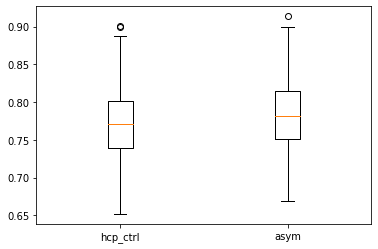

In [17]:
plt.boxplot((dev_test, dev_asym),
            labels=('hcp_ctrl','asym'))

In [18]:
F,p = ks_2samp(dev_test, dev_asym)
print(p)

0.30433989008146495


## Analysis

In [10]:
random.seed(a=12)
list_encoded_asym = random.sample(list(df_encoded_asym['sub']), 100)
df_encoded_asym_X = df_encoded_asym[df_encoded_asym['sub'].astype(int).isin(list_encoded_asym)]

list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(df_encoded_asym_X['sub'].astype(int))))
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(list_ctrl)]

X_asym = np.array(list(df_encoded_asym_X['latent']))
X_hcp = np.array(list(df_encoded_hcp_X['latent']))
X_all = np.array(list(df_encoded_hcp_X['latent']) + list(df_encoded_asym_X['latent']))

labels_asym = np.array(list(df_encoded_hcp_X['Group']) + ['asymmetry' for k in range(len(df_encoded_asym_X))])
reducer = umap.UMAP(random_state=14)
embedding_asym = reducer.fit_transform(X_all)

In [71]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

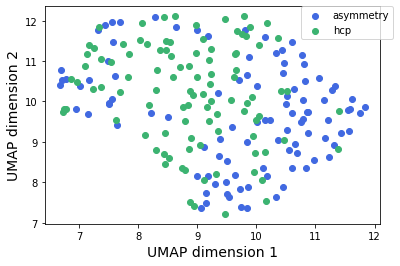

In [145]:
arr = embedding_asym
color_dict = {'hcp':'mediumseagreen', 'asymmetry': 'royalblue'}

fig = plt.figure(figsize=(6,4))
ax = fig.subplots()

for g in np.unique(labels_asym):
    ix = np.where(labels_asym == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    g_lab= f"{g}"
    ax.scatter(x, y, c = color_dict[g], label = g_lab)
    
# ax.scatter(centeroidnp(embedding_asym[:100])[0], 
#            centeroidnp(embedding_asym[:100])[1], c='mediumseagreen', marker='x')
# ax.scatter(centeroidnp(embedding_asym[100:])[0],
#            centeroidnp(embedding_asym[100:])[1], c='royalblue', marker='x')

# for i, txt in enumerate(list(df_encoded_asym_X['sub'])):
#     if txt=='887373':
#         ax.annotate(txt, (embedding_asym[100:][i][0], embedding_asym[100:][i][1]))
# for i, txt in enumerate(list(df_encoded_hcp_X['sub'])):
#     if txt==844961:
#         ax.annotate(txt, (embedding_asym[:100][i][0], embedding_asym[:100][i][1]))
    
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.xlabel(f'UMAP dimension 1', fontsize=14)
plt.ylabel(f'UMAP dimension 2', fontsize=14)
plt.show()

### Average patterns

In [107]:
sel_asym = np.array([embedding_asym[100:][k][0]>9 for k in range(100)])
sub_sel_asym = np.array(df_encoded_asym_X['sub'])[sel_asym]
latent_sel_asym = np.array(df_encoded_asym_X.latent)[sel_asym]

In [139]:
enc_asym = np.array([np.mean([latent_sel_asym[k][i] for k in range(len(latent_sel_asym))]) for i in range(75)])

In [143]:
z = torch.from_numpy(np.array(enc_asym)).to(device, dtype=torch.float32)
z = torch.unsqueeze(z, dim=0)
out = model.decode(z)
out = np.array(np.squeeze(out).cpu().detach().numpy())

out[out>0.4] = 1
out[out<=0.4] = 0

aims.write(dtx.convert.bucket_numpy_to_bucketMap_aims(dtx.convert.volume_to_bucket_numpy(out), 
                                                      voxel_size=(1,1,1)), 
            f"{tgt_dir}asym_bucket.bck")

aims.write(dtx.convert.bucket_to_mesh(dtx.convert.volume_to_bucket_numpy(out)), 
            f"{tgt_dir}asym_mesh.mesh")

In [141]:
enc_hcp = np.array([np.mean([np.array(df_encoded_hcp_X.latent)[k][i] for k in range(100)]) for i in range(75)])

In [144]:
z = torch.from_numpy(np.array(enc_hcp)).to(device, dtype=torch.float32)
z = torch.unsqueeze(z, dim=0)
out = model.decode(z)
out = np.array(np.squeeze(out).cpu().detach().numpy())

out[out>0.4] = 1
out[out<=0.4] = 0

aims.write(dtx.convert.bucket_numpy_to_bucketMap_aims(dtx.convert.volume_to_bucket_numpy(out), 
                                                      voxel_size=(1,1,1)), 
            f"{tgt_dir}ctrl_bucket.bck")

aims.write(dtx.convert.bucket_to_mesh(dtx.convert.volume_to_bucket_numpy(out)), 
            f"{tgt_dir}ctrl_mesh.mesh")

### Interpolations

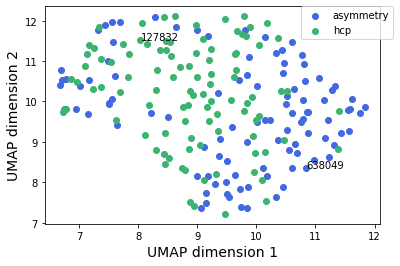

In [147]:
arr = embedding_asym
color_dict = {'hcp':'mediumseagreen', 'asymmetry': 'royalblue'}

fig = plt.figure(figsize=(6,4))
ax = fig.subplots()

for g in np.unique(labels_asym):
    ix = np.where(labels_asym == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    g_lab= f"{g}"
    ax.scatter(x, y, c = color_dict[g], label = g_lab)
    
# ax.scatter(centeroidnp(embedding_asym[:100])[0], 
#            centeroidnp(embedding_asym[:100])[1], c='mediumseagreen', marker='x')
# ax.scatter(centeroidnp(embedding_asym[100:])[0],
#            centeroidnp(embedding_asym[100:])[1], c='royalblue', marker='x')

for i, txt in enumerate(list(df_encoded_asym_X['sub'])):
    if txt=='638049':
        ax.annotate(txt, (embedding_asym[100:][i][0], embedding_asym[100:][i][1]))
for i, txt in enumerate(list(df_encoded_hcp_X['sub'])):
    if txt==127832:
        ax.annotate(txt, (embedding_asym[:100][i][0], embedding_asym[:100][i][1]))
    
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.xlabel(f'UMAP dimension 1', fontsize=14)
plt.ylabel(f'UMAP dimension 2', fontsize=14)
plt.show()

In [148]:
z_ctrl = df_encoded_hcp_X[df_encoded_hcp_X['sub']==127832].latent.values[0]
z_asym = df_encoded_asym_X[df_encoded_asym_X['sub']=='638049'].latent.values[0]

In [176]:
list_enc = [z_ctrl] + [z_ctrl + ((z_asym-z_ctrl)/5)*k for k in [1,2,3,4]] + [z_asym]

In [179]:
arr_out = []
values = []

for k in range(6):
    enc = list_enc[k]
    z = torch.from_numpy(np.array(enc)).to(device, dtype=torch.float32)
    z = torch.unsqueeze(z, dim=0)
    out = model.decode(z)
    out = np.array(np.squeeze(out).cpu().detach().numpy())
    
    out[out>0.5] = 1
    out[out<=0.5] = 0
    
    arr_out.append(out)
    values.append(f"step_{k}")

In [180]:
tgt_dir = '/neurospin/dico/lguillon/distmap/results_benchmark/'
for k in range(6):
    #np.save(f"{tgt_dir}skel_step_{k}", arr_out[k])
    aims.write(dtx.convert.bucket_numpy_to_bucketMap_aims(dtx.convert.volume_to_bucket_numpy(arr_out[k]), 
                                                          voxel_size=(1,1,1)), 
                f"{tgt_dir}interpolation_bucket_step_{k}.bck")
    aims.write(dtx.convert.bucket_to_mesh(dtx.convert.volume_to_bucket_numpy(arr_out[k])), 
            f"{tgt_dir}interpolation_mesh_step_{k}.mesh")

### Classification

>acc=0.725, est=0.738, cfg={'C': 0.7, 'penalty': 'l2'}
>acc=0.825, est=0.731, cfg={'C': 0.7, 'penalty': 'l2'}
>acc=0.775, est=0.794, cfg={'C': 0.7, 'penalty': 'l2'}
>acc=0.775, est=0.762, cfg={'C': 0.7, 'penalty': 'l2'}
>acc=0.800, est=0.750, cfg={'C': 0.7, 'penalty': 'l2'}


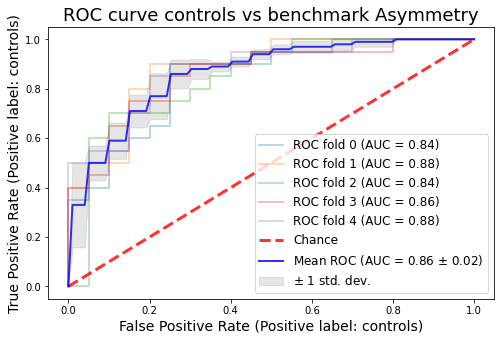

Accuracy: 0.780 (0.033)


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_all, labels_asym, test_size=0.4, stratify=labels_asym, random_state=42)

fig, ax = plt.subplots(figsize=(8, 5))

cv_outer = StratifiedKFold(n_splits=5)

outer_results = list()
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
i = 0

for train_ix, test_ix in cv_outer.split(X_all, labels_asym):
    X_train, X_test = X_all[train_ix, :], X_all[test_ix, :]
    y_train, y_test = labels_asym[train_ix], labels_asym[test_ix]
    cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    model = LinearSVC(random_state=1, loss='squared_hinge', max_iter=10000)
    space = dict()
    space['penalty'] = ['l2']
    space['C'] = [0.7, 1, 1.2]
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = metrics.accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
        
    viz = metrics.plot_roc_curve(best_model, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=2, ax=ax)
    i += 1 
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve ")
ax.legend(loc="lower right", fontsize='large')
plt.xlabel('False Positive Rate (Positive label: controls)', fontsize=14)
plt.ylabel('True Positive Rate (Positive label: controls)', fontsize=14)
plt.title('ROC curve controls vs benchmark Asymmetry', fontsize=18)
plt.show()
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

In [183]:
imp = best_model.coef_
imp_abs = list([abs(imp[0][k]) for k in range(len(imp[0]))])
imp_abs, names = zip(*sorted(list(zip(list(imp[0]), [k for k in range(len(imp_abs))]))))
print(imp_abs[-5:], names[-5:])

(0.36372828246022637, 0.37421382448836943, 0.37903660738738204, 0.5113462139188405, 0.5941544942114421) (47, 68, 48, 32, 21)


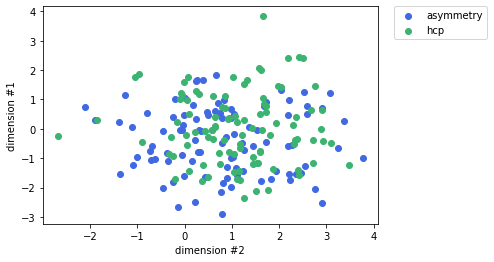

In [184]:
color_dict = {'hcp': 'mediumseagreen', 'asymmetry': 'royalblue'}
most_imp = [21,32]
arr = np.array([np.array([X_all[i][k] for k in most_imp]) for i in range(len(X_all))])

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(labels_asym):
    #if g == 'HCP' or g == 'leftHanders':
    ix = np.where(labels_asym == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    #ax.scatter(arr[ix][0], arr[ix][1], arr[ix][2], c = color_dict[g], label = g)
    g_lab=g
    ax.scatter(x, y, c = color_dict[g], label = g_lab)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('dimension #2')
plt.ylabel('dimension #1')
    
plt.show()

In [187]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.6625  0.65625 0.66875 0.6875  0.64375 0.6625  0.65625 0.6625  0.6625
 0.66875 0.68125 0.65    0.6625  0.68125 0.68125 0.65625 0.64375 0.66875
 0.66875 0.68125 0.63125 0.6375  0.65    0.6625  0.675   0.66875 0.65
 0.65625 0.675   0.65625 0.675   0.69375     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan 0.65625 0.65    0.65625 0.68125 0.64375 0.6625  0.65625 0.6625
 0.6625  0.66875 0.66875 0.65    0.6625  0.6875  0.6875  0.65625 0.65625
 0.675   0.66875 0.66875 0.63125 0.64375 0.65    0.6625  0.68125 0.65625
 0.65    0.65    0.675   0.65625 0.675   0.69375]
  category=UserWarning


>acc=0.800, est=0.694, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'exponential', 'n_estimators': 150}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.6875  0.66875 0.68125 0.6875  0.6625  0.66875 0.66875 0.6875  0.7125
 0.7     0.69375 0.70625 0.68125 0.7     0.7125  0.71875 0.675   0.68125
 0.7     0.71875 0.6875  0.6875  0.69375 0.7     0.725   0.71875 0.6875
 0.7125  0.7125  0.7     0.69375 0.70625     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan 0.6875  0.66875 0.68125 0.69375 0.66875 0.675   0.675   0.69375
 0.70625 0.69375 0.6875  0.69375 0.675   0.69375 0.7125  0.71875 0.66875
 0.68125 0.69375 0.71875 0.6875  0.6875  0.69375 0.7     0.725   0.71875
 0.6875  0.7125  0.69375 0.7     0.69375 0.70625]
  category=UserWarning


>acc=0.700, est=0.725, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'deviance', 'n_estimators': 50}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.6625  0.66875 0.70625 0.6875  0.675   0.6875  0.6875  0.70625 0.71875
 0.70625 0.725   0.71875 0.6875  0.7125  0.69375 0.7125  0.6875  0.7
 0.70625 0.725   0.725   0.73125 0.73125 0.725   0.70625 0.7125  0.725
 0.71875 0.71875 0.7     0.7     0.70625     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan 0.66875 0.675   0.7125  0.69375 0.66875 0.6875  0.6875  0.70625
 0.725   0.71875 0.725   0.71875 0.68125 0.7125  0.7     0.71875 0.69375
 0.7     0.70625 0.725   0.725   0.725   0.73125 0.725   0.70625 0.70625
 0.71875 0.7125  0.71875 0.7     0.7     0.7125 ]
  category=UserWarning


>acc=0.675, est=0.731, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 75}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.65625 0.7     0.70625 0.69375 0.675   0.6875  0.69375 0.69375 0.68125
 0.68125 0.7     0.70625 0.66875 0.7     0.7     0.7375  0.675   0.675
 0.68125 0.7     0.68125 0.7     0.6875  0.71875 0.66875 0.6875  0.7
 0.69375 0.7125  0.69375 0.7375  0.7         nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan 0.6625  0.7     0.70625 0.6875  0.675   0.6875  0.69375 0.69375
 0.68125 0.68125 0.7     0.70625 0.66875 0.7     0.7     0.7375  0.675
 0.675   0.68125 0.7     0.68125 0.70625 0.6875  0.71875 0.66875 0.6875
 0.7     0.69375 0.7125  0.69375 0.7375  0.7    ]
  category=UserWarning


>acc=0.800, est=0.738, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.7625  0.76875 0.7625  0.76875 0.775   0.8     0.76875 0.7625  0.71875
 0.7375  0.725   0.75625 0.78125 0.7625  0.7625  0.75625 0.7875  0.775
 0.75    0.75625 0.7625  0.76875 0.75625 0.76875 0.75625 0.76875 0.7625
 0.76875 0.775   0.75625 0.75625 0.78125     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan 0.7625  0.76875 0.7625  0.7625  0.775   0.8     0.7625  0.7625
 0.71875 0.7375  0.73125 0.7625  0.775   0.7625  0.7625  0.75    0.78125
 0.775   0.75    0.75625 0.76875 0.7625  0.7625  0.75625 0.75625 0.76875
 0.7625  0.7625  0.76875 0.75625 0.75625 0.76875]
  category=UserWarning


>acc=0.675, est=0.800, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 75}


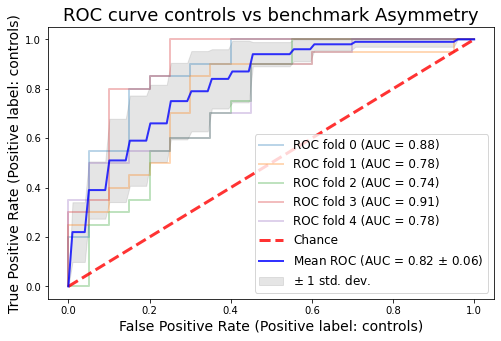

Accuracy: 0.730 (0.058)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_all, labels_asym, test_size=0.4, stratify=labels_asym, random_state=42)

fig, ax = plt.subplots(figsize=(8, 5))

cv_outer = StratifiedKFold(n_splits=5)

outer_results = list()
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
i = 0

for train_ix, test_ix in cv_outer.split(X_all, labels_asym):
    X_train, X_test = X_all[train_ix, :], X_all[test_ix, :]
    y_train, y_test = labels_asym[train_ix], labels_asym[test_ix]
    cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    model = GradientBoostingClassifier(random_state=1)
    space = dict()
    space['loss'] = ['deviance', 'exponential']
    space['learning_rate'] = [0.05, 0.1, 0.2, 0.25]
    space['n_estimators'] = [50, 75, 100, 150]
    space['criterion'] = ['friedman_mse', 'squared_error', 'mse']
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = metrics.accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
        
    viz = metrics.plot_roc_curve(best_model, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=2, ax=ax)
    i += 1 
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve ")
ax.legend(loc="lower right", fontsize='large')
plt.xlabel('False Positive Rate (Positive label: controls)', fontsize=14)
plt.ylabel('True Positive Rate (Positive label: controls)', fontsize=14)
plt.title('ROC curve controls vs benchmark Asymmetry', fontsize=18)
plt.show()
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

In [12]:
search.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, loss='exponential',
                           n_estimators=75, random_state=1)

In [13]:
imp = search.best_estimator_.feature_importances_
imp, names = zip(*sorted(list(zip(imp, [k for k in range(len(imp))]))))
print(imp[-5:], names[-5:])

(0.07140098658357497, 0.09242664841443164, 0.09809862255332541, 0.09835635463001523, 0.10809004721356763) (72, 7, 48, 56, 9)


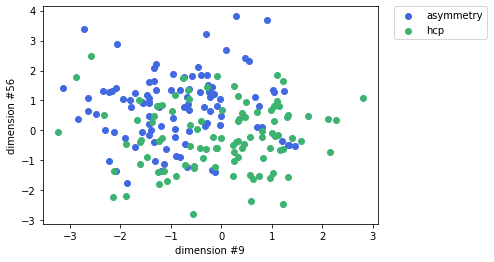

In [14]:
color_dict = {'hcp': 'mediumseagreen', 'asymmetry': 'royalblue'}
most_imp = [9,56]
arr = np.array([np.array([X_all[i][k] for k in most_imp]) for i in range(len(X_all))])

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(labels_asym):
    #if g == 'HCP' or g == 'leftHanders':
    ix = np.where(labels_asym == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    #ax.scatter(arr[ix][0], arr[ix][1], arr[ix][2], c = color_dict[g], label = g)
    g_lab=g
    ax.scatter(x, y, c = color_dict[g], label = g_lab)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('dimension #9')
plt.ylabel('dimension #56')
    
plt.show()

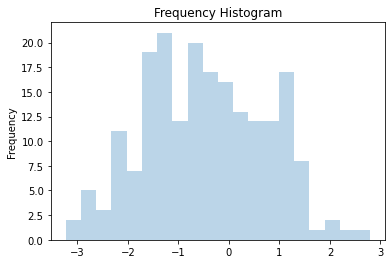

In [15]:
# What is range of most important features values ?
range_values_dim_1 = [k[9] for k in X_all] 
fig = plt.figure()
plt.hist(range_values_dim_1, bins=20, alpha=0.3)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [77]:
values_9 = np.arange(-3, 3, 1)
arr_out = []
values= []
mean = torch.randn((1, 75), device=device)
logvar = torch.randn((1, 75), device=device)
z = model_vae.sample_z(mean, logvar)
    
for val in values_9:
    z[0][9] = val
    out = model_vae.decode(z)
    out = np.array(np.squeeze(out).cpu().detach().numpy())
    out[out>0.45] = 1
    out[out<=0.45] = 0
    arr_out.append(out)
    values.append(val)
    
arr_out = np.array(arr_out)

tgt_dir = '/neurospin/dico/lguillon/distmap/results_benchmark/'
for k in range(6):
    #np.save(f"{tgt_dir}skel_step_{k}", arr_out[k])
    aims.write(dtx.convert.bucket_numpy_to_bucketMap_aims(dtx.convert.volume_to_bucket_numpy(arr_out[k]), 
                                                          voxel_size=(1,1,1)), 
                f"{tgt_dir}generation_bucket_step_{k}.bck")
    aims.write(dtx.convert.bucket_to_mesh(dtx.convert.volume_to_bucket_numpy(arr_out[k])), 
            f"{tgt_dir}generation_mesh_step_{k}.mesh")

In [84]:
average_z

array([ 0.22165577, -0.10781032, -0.01647447, -0.44513673, -0.6464098 ,
       -0.29768345, -0.16996191,  0.09877384, -0.02002383, -0.05042643,
        0.4430079 , -0.17766368, -0.47424498,  0.6568481 ,  0.07365757,
       -0.07313941, -0.09874762,  0.10386168,  0.54984117, -0.23374434,
       -0.16634347,  1.1117764 , -0.20251301,  0.17298795,  0.40931836,
       -0.05887454,  0.3597623 , -0.12590612, -0.16621698,  0.8032644 ,
       -0.62379086, -0.22953731,  0.04940896,  0.1020221 ,  0.08276769,
        0.06823626,  0.24470848, -0.1491772 ,  0.43559742,  0.15874155,
        0.22544889,  0.4966755 , -0.39050856, -0.25834566, -0.5298638 ,
        0.2908957 ,  0.14458205,  0.41625756,  0.19821285, -0.6747946 ,
        0.36335647,  0.62872225, -0.69365466, -0.25409913,  1.436783  ,
        0.45978   , -0.19340056, -0.65084976,  0.0058236 ,  0.24667755,
        0.17910379,  0.04768254, -0.69057256, -0.614451  ,  0.11592811,
       -0.93377435, -0.55966425,  0.8674221 ,  0.36698318,  0.04

In [119]:
values_9 = np.arange(-3, 4, 1)
arr_out = []
values= []

for val in values_9:
    #average_z = [np.mean([np.array(df_encoded_hcp_X.latent)[k][i] for k in range(100)]) for i in range(75)]
    average_z = [np.mean([X_all[k][i] for k in range(200)]) for i in range(75)]
    average_z[9] = val
    #average_z = average_z[:9] + [val] + average_z[10:]
    
    average_z = torch.from_numpy(np.array(average_z)).to(device, dtype=torch.float32)
    average_z = torch.unsqueeze(average_z, dim=0)

    out = model_vae.decode(average_z)
    out = np.array(np.squeeze(out).cpu().detach().numpy())
    out[out>0.4] = 1
    out[out<=0.4] = 0
    arr_out.append(out)
    values.append(val)
    
arr_out = np.array(arr_out)

tgt_dir = '/neurospin/dico/lguillon/distmap/results_benchmark/'
for k in range(6):
    #np.save(f"{tgt_dir}skel_step_{k}", arr_out[k])
    aims.write(dtx.convert.bucket_numpy_to_bucketMap_aims(dtx.convert.volume_to_bucket_numpy(arr_out[k]), 
                                                          voxel_size=(1,1,1)), 
                f"{tgt_dir}generation_bucket_step_{k}.bck")
    aims.write(dtx.convert.bucket_to_mesh(dtx.convert.volume_to_bucket_numpy(arr_out[k])), 
            f"{tgt_dir}generation_mesh_step_{k}.mesh")

## Folding space - loss distributions

In [50]:
len(df_encoded_deletion)

507

In [51]:
len(df_encoded_200_X)

93

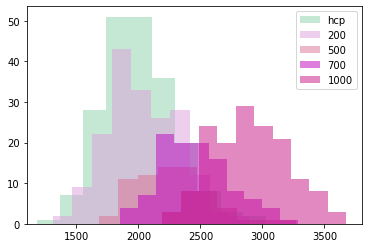

In [74]:
plt.subplot()
plt.xlim([1100, 3800])
plt.hist(df_encoded_hcp.loss, color='mediumseagreen', alpha=0.3, label='hcp')
plt.hist(df_encoded_deletion[df_encoded_deletion.group=='200'].loss, color='plum', alpha=0.5, label='200')
plt.hist(df_encoded_deletion[df_encoded_deletion.group=='500'].loss, color='palevioletred', alpha=0.5, label='500')
plt.hist(df_encoded_deletion[df_encoded_deletion.group=='700'].loss, color='m', alpha=0.5, label='700') 
plt.hist(df_encoded_deletion[df_encoded_deletion.group=='1000'].loss, color='mediumvioletred', alpha=0.5, label='1000')
plt.legend()

In [83]:
F,p = mannwhitneyu(df_encoded_hcp.loss, df_encoded_deletion[df_encoded_deletion.group=='200'].loss)
print(p)
F,p = mannwhitneyu(df_encoded_hcp.loss, df_encoded_deletion[df_encoded_deletion.group=='500'].loss)
print(p)
F,p = mannwhitneyu(df_encoded_hcp.loss, df_encoded_deletion[df_encoded_deletion.group=='700'].loss)
print(p)
F,p = mannwhitneyu(df_encoded_hcp.loss, df_encoded_deletion[df_encoded_deletion.group=='1000'].loss)
print(p)

0.13405716752885355
8.063715007845529e-10
1.5333475604152505e-26
2.882310954362431e-54


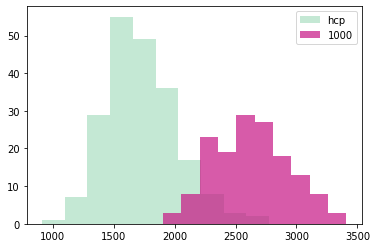

In [81]:
plt.subplot()
plt.hist(df_encoded_hcp.recon, color='mediumseagreen', alpha=0.3, label='hcp')
#plt.hist(df_encoded_deletion[df_encoded_deletion.group=='200'].recon, color='plum', alpha=0.5, label='200')
#plt.hist(df_encoded_deletion[df_encoded_deletion.group=='500'].recon, color='palevioletred', alpha=0.7, label='500')
#plt.hist(df_encoded_deletion[df_encoded_deletion.group=='700'].recon, color='m', alpha=0.5, label='700') 
plt.hist(df_encoded_deletion[df_encoded_deletion.group=='1000'].recon, color='mediumvioletred', alpha=0.7, label='1000')
plt.legend()

In [116]:
list_encoded_200 = random.sample(list(deletion_200['sub']), 100)
df_encoded_200_X = deletion_200[deletion_200['sub'].astype(int).isin(list_encoded_200)]

list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(df_encoded_200_X['sub'].astype(int))))
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(list_ctrl)]

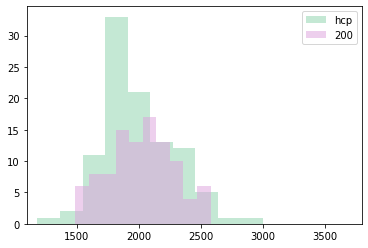

In [117]:
plt.subplot()
plt.xlim([1100, 3800])
plt.hist(df_encoded_hcp_X.loss, color='mediumseagreen', alpha=0.3, label='hcp')
plt.hist(df_encoded_200_X.loss, color='plum', alpha=0.5, label='200')
plt.legend()

In [118]:
F,p = mannwhitneyu(df_encoded_hcp_X.loss, df_encoded_200_X.loss)
print(p)
F,p = ks_2samp(df_encoded_hcp_X.loss, df_encoded_200_X.loss)
print(p)

0.20967579320349722
0.26055273160812736


In [119]:
df_encoded_500_X = deletion_500

list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(deletion_500['sub'].astype(int))))
random_ctrl = random.sample(list_ctrl, 100)
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(random_ctrl)]

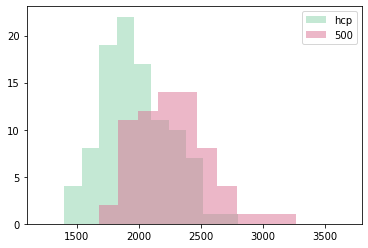

In [120]:
plt.subplot()
plt.xlim([1100, 3800])
plt.hist(df_encoded_hcp_X.loss, color='mediumseagreen', alpha=0.3, label='hcp')
plt.hist(df_encoded_500_X.loss, color='palevioletred', alpha=0.5, label='500')
plt.legend()

In [121]:
F,p = mannwhitneyu(df_encoded_hcp_X.loss, df_encoded_500_X.loss)
print(p)
F,p = ks_2samp(df_encoded_hcp_X.loss, df_encoded_500_X.loss)
print(p)

1.0737435822935459e-09
1.1089679835628955e-07


In [122]:
list_encoded_700 = random.sample(list(deletion_700['sub']), 100)
df_encoded_700_X = deletion_700[deletion_700['sub'].astype(int).isin(list_encoded_700)]
list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(df_encoded_700_X['sub'].astype(int))))
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(list_ctrl)]

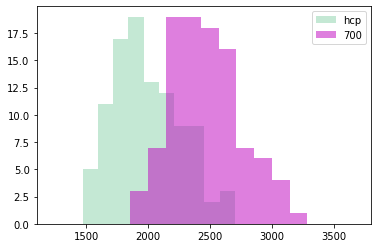

In [123]:
plt.subplot()
plt.xlim([1100, 3800])
plt.hist(df_encoded_hcp_X.loss, color='mediumseagreen', alpha=0.3, label='hcp')
plt.hist(df_encoded_700_X.loss, color='m', alpha=0.5, label='700') 
plt.legend()

In [124]:
F,p = mannwhitneyu(df_encoded_hcp_X.loss, df_encoded_700_X.loss)
print(p)
F,p = ks_2samp(df_encoded_hcp_X.loss, df_encoded_700_X.loss)
print(p)

2.706751769689624e-20
3.2764005184650757e-17


In [125]:
list_encoded_1000 = random.sample(list(deletion_1000['sub']), 100)
df_encoded_1000_X = deletion_1000[deletion_1000['sub'].astype(int).isin(list_encoded_1000)]
list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(df_encoded_1000_X['sub'].astype(int))))
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(list_ctrl)]

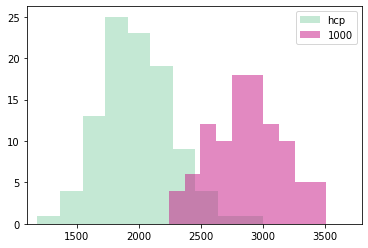

In [126]:
plt.subplot()
plt.xlim([1100, 3800])
plt.hist(df_encoded_hcp_X.loss, color='mediumseagreen', alpha=0.3, label='hcp')
plt.hist(df_encoded_1000_X.loss, color='mediumvioletred', alpha=0.5, label='1000') 
plt.legend()

In [127]:
F,p = mannwhitneyu(df_encoded_hcp_X.loss, df_encoded_1000_X.loss)
print(p)
F,p = ks_2samp(df_encoded_hcp_X.loss, df_encoded_1000_X.loss)
print(p)

3.674315979879044e-32
5.774179148531572e-37


In [128]:
df_200_500 = pd.merge(deletion_200, deletion_500, how='inner', on='sub', suffixes=('_200', '_500'))
df_700_1000 = pd.merge(deletion_700, deletion_1000, how='inner', on='sub', suffixes=('_700', '_1000'))
deletion_all = pd.merge(df_200_500, df_700_1000, how='inner', on='sub')

In [130]:
list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(deletion_all['sub'].astype(int))))
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(list_ctrl)]

In [262]:
# plt.subplot()
# plt.xlim([1100, 3800])
# plt.hist(df_encoded_hcp_X[:50].loss, color='mediumseagreen', alpha=0.3, label='hcp')
# # plt.scatter(deletion_all.loss_200[:1], [1], color='plum', alpha=0.8, label='200') 
# # plt.scatter(deletion_all.loss_500[:1], [1], color='palevioletred', alpha=0.8, label='500') 
# # plt.scatter(deletion_all.loss_700[:1], [1], color='m', alpha=0.8, label='700') 
# # plt.scatter(deletion_all.loss_1000[:1], [1], color='mediumvioletred', alpha=0.8, label='1000') 

# plt.scatter(deletion_all.loss_200[1], [2], color='plum', alpha=0.8, label='200', marker='o') 
# plt.scatter(deletion_all.loss_500[1], [2], color='palevioletred', alpha=0.8, label='500', marker='o') 
# plt.scatter(deletion_all.loss_700[1], [2], color='m', alpha=0.8, label='700', marker='o') 
# plt.scatter(deletion_all.loss_1000[1], [2], color='mediumvioletred', alpha=0.8, label='1000', marker='o') 

# plt.plot(deletion_all.loss_200[2], [2], color='plum', alpha=0.8, label='200', marker='->') 
# plt.scatter(deletion_all.loss_500[2], [2], color='palevioletred', alpha=0.8, label='500', marker='->') 
# plt.scatter(deletion_all.loss_700[2], [2], color='m', alpha=0.8, label='700', marker='->') 
# plt.scatter(deletion_all.loss_1000[2], [2], color='mediumvioletred', alpha=0.8, label='1000', marker='->') 

# # plt.scatter(deletion_all.loss_200[3], [3], color='plum', alpha=0.8, label='200', marker='X') 
# # plt.scatter(deletion_all.loss_500[3], [3], color='palevioletred', alpha=0.8, label='500', marker='X') 
# # plt.scatter(deletion_all.loss_700[3], [3], color='m', alpha=0.8, label='700', marker='X') 
# # plt.scatter(deletion_all.loss_1000[3], [3], color='mediumvioletred', alpha=0.8, label='1000', marker='X') 

# # plt.hist(deletion_all.loss_700, color='m', alpha=0.5, label='700') 
# # plt.hist(deletion_all.loss_1000, color='mediumvioletred', alpha=0.5, label='1000') 


# # plt.plot(np.histogram(list(deletion_all.loss_200))[1][:-1],np.histogram(list(deletion_all.loss_200))[0], color='plum', alpha=0.8, label='200') # plt.hist(deletion_all.loss_500, color='palevioletred', alpha=0.5, label='500') 
# # plt.plot(np.histogram(list(deletion_all.loss_500))[1][:-1],np.histogram(list(deletion_all.loss_500))[0], color='palevioletred', alpha=0.8, label='500') # plt.hist(deletion_all.loss_500, color='palevioletred', alpha=0.5, label='500') 
# # plt.plot(np.histogram(list(deletion_all.loss_700))[1][:-1],np.histogram(list(deletion_all.loss_700))[0], color='m', alpha=0.8, label='500') # plt.hist(deletion_all.loss_500, color='palevioletred', alpha=0.5, label='500') 
# # plt.plot(np.histogram(list(deletion_all.loss_1000))[1][:-1],np.histogram(list(deletion_all.loss_1000))[0], color='mediumvioletred', alpha=0.8, label='500') # plt.hist(deletion_all.loss_500, color='palevioletred', alpha=0.5, label='500') 

# plt.legend()

In [261]:
delta_loss_200, delta_loss_500, delta_loss_700, delta_loss_1000 = [], [], [], []
for k in range(len(deletion_all)):
    sub = deletion_all['sub'][k]
    delta = (deletion_all['loss_200'].values[k] - df_encoded_hcp[df_encoded_hcp['sub']==int(sub)].loss.values)[0]
    delta_loss_200.append(delta)
    
    delta = (deletion_all['loss_500'].values[k] - df_encoded_hcp[df_encoded_hcp['sub']==int(sub)].loss.values)[0]
    delta_loss_500.append(delta)
    
    delta = (deletion_all['loss_700'].values[k] - df_encoded_hcp[df_encoded_hcp['sub']==int(sub)].loss.values)[0]
    delta_loss_700.append(delta)
    
    delta = (deletion_all['loss_1000'].values[k] - df_encoded_hcp[df_encoded_hcp['sub']==int(sub)].loss.values)[0]
    delta_loss_1000.append(delta)

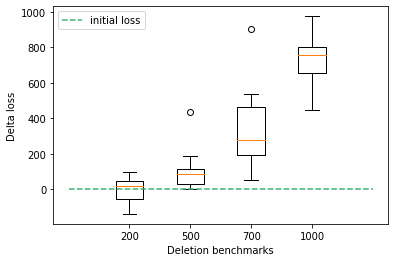

In [260]:
plt.boxplot((delta_loss_200, delta_loss_500, delta_loss_700, delta_loss_1000),
            labels=('200','500','700','1000'))
plt.plot(['0','200','500','700','1000', '2000'], [0, 0, 0, 0, 0, 0], color='mediumseagreen', ls='--',
        label='initial loss')
plt.xlabel('Deletion benchmarks')
plt.ylabel('Delta loss')
plt.legend()

### Asymmetry

In [269]:
list_encoded_asym = random.sample(list(df_encoded_asym['sub']), 100)
df_encoded_asym_X = df_encoded_asym[df_encoded_asym['sub'].astype(int).isin(list_encoded_asym)]

list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(df_encoded_asym_X['sub'].astype(int))))
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(list_ctrl)]

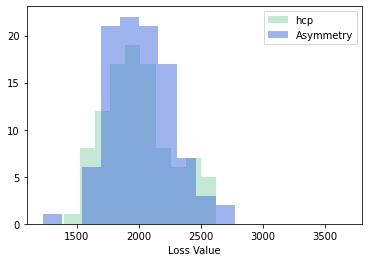

In [78]:
plt.subplot()
plt.xlim([1100, 3800])
plt.hist(df_encoded_hcp_X.loss, color='mediumseagreen', alpha=0.3, label='hcp')
plt.hist(df_encoded_asym_X.loss, color='royalblue', alpha=0.5, label='Asymmetry') 
plt.xlabel('Loss Value')
plt.legend()

In [79]:
F,p = mannwhitneyu(df_encoded_hcp_X.loss, df_encoded_asym_X.loss)
print(p)
F,p = ks_2samp(df_encoded_hcp_X.loss, df_encoded_asym_X.loss)
print(p)

0.11969701124969384
0.5560171662297567


In [1]:
len(df_encoded_hcp_X)

NameError: name 'df_encoded_hcp_X' is not defined

## Left-handed subjects

In [5]:
### Loading of subjects
handedness = pd.read_csv('/neurospin/dico/lguillon/hcp_info/handedness.csv')

filenames = np.load('/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/1mm/SC/no_mask/Rdistmaps/sub_id.npy')
distmaps = np.load('/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/1mm/SC/no_mask/Rdistmaps/distmap_1mm.npy', mmap_mode='r')

In [6]:
handedness.head()

,Unnamed: 0,Subject,Handedness,GlobalHand
0,0,100004,95,R
1,1,100206,65,R
2,2,100307,95,R
3,3,100408,55,R
4,4,100610,85,R


In [7]:
left_info = pd.DataFrame(handedness[handedness.Handedness<=-10][['Subject', 'Handedness']].values, columns=['subjects', 'handedness_score'])
left_info.subjects = left_info.subjects.astype(str)
print(len(left_info))

108


In [8]:
left_info.head()

,subjects,handedness_score
0,101915,-75
1,102109,-25
2,107119,-75
3,107725,-40
4,110007,-20


In [9]:
#list_left = pd.DataFrame(handedness[handedness.GlobalHand=='L'].Subject.values, columns=['subjects'])
#list_left = pd.DataFrame(handedness[handedness.Handedness<=-90].Subject.values, columns=['subjects'])
list_left = np.array(list(left_info.subjects))
print(len(list_left))

filenames = np.load('/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/1mm/SC/no_mask/Rdistmaps/sub_id.npy')
distmaps = np.load('/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/1mm/SC/no_mask/Rdistmaps/distmap_1mm.npy', mmap_mode='r')

#filenames_df = pd.DataFrame(list(filenames), columns=['subjects'])

# sorter = np.argsort(filenames)
# filenames_idx = sorter[np.searchsorted(filenames, list_left, sorter=sorter)]
# filenames = filenames[filenames_idx]
# distmaps = distmaps[filenames_idx]

# filenames_df = pd.DataFrame(list(filenames), columns=['subjects'])

# print(distmaps.shape, filenames.shape)

# subset = SkeletonDataset(dataframe=distmaps,
#                          filenames=filenames,
#                          data_transforms=False)

# left_info = pd.merge(left_info, filenames_df,
#                             right_on='subjects',
#                             left_on='subjects',
#                             how='inner')
print(len(left_info))

sorter = np.argsort(filenames)
filenames_idx = sorter[np.searchsorted(filenames, list(left_info.subjects), sorter=sorter)]
filenames = filenames[filenames_idx]
distmaps = distmaps[filenames_idx]

filenames_df = pd.DataFrame(list(filenames), columns=['subjects'])

print(distmaps.shape, filenames.shape)

subset = SkeletonDataset(dataframe=distmaps,
                         filenames=filenames,
                         data_transforms=False)

108
108
(108, 78, 63, 88, 1) (108,)


In [10]:
left_loader = torch.utils.data.DataLoader(
               subset,
               batch_size=1,
               num_workers=1,
               shuffle=False)

dico_set_loaders = {'left_handers': left_loader}

root_dir = '/neurospin/dico/lguillon/distmap/benchmark/results/'

criterion = nn.MSELoss(reduction='sum')
tester_left = ModelTester(model=model_vae, dico_set_loaders=dico_set_loaders,
                     loss_func=criterion, kl_weight=2,
                     n_latent=75, depth=3)

results_left = tester_left.test()
encoded_left = {loader_name:[results_left[loader_name][k][1] for k in results_left[loader_name].keys()] for loader_name in dico_set_loaders.keys()}
losses_left = {loader_name:[int(results_left[loader_name][k][0].cpu().detach().numpy()) for k in results_left[loader_name].keys()] for loader_name in dico_set_loaders.keys()}
recon_left = {loader_name:[int(results_left[loader_name][k][2].cpu().detach().numpy()) for k in results_left[loader_name].keys()] for loader_name in dico_set_loaders.keys()}
input_left = {loader_name:[results_left[loader_name][k][3].cpu().detach().numpy() for k in results_left[loader_name].keys()] for loader_name in dico_set_loaders.keys()}

left_handers
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
[0.0000000e+00 1.2707710e-04 1.3637543e-04 ... 9.9940717e-01 9.9958885e-01
 9.9971163e-01]
[0.0000000e+00 3.4570694e-05 3.7670135e-05 ... 9.9923098e-01 9.9966180e-01
 9.9996257e-01]
[0.0000000e+00 6.8187714e-05 8.0823898e-05 ... 9.9969554e-01 9.9970090e-01
 9.9988246e-01]
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
[0.0000000e+00 1.0251999e-05 1.0728836e-05 ... 9.9939382e-01 9.9948728e-01
 9.9993587e-01]
[0.0000000e+00 1.0037422e-04 1.0371208e-04 ... 9.9921489e-01 9.9929500e-01
 9.9964750e-01]
[0.0000000e+00 5.4359436e-05 5.8889389e-05 ... 9.9887311e-01 9.9897456e-01
 9.9947667e-01]
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
[0.0000000e+00 5.2452087e-05 5.5551529e-05 ... 9.9970090e-01 9.9983490e-01
 9.9997866e-01]
[0.0000000e+00 1.4543533e-05 2.0980835e-05 ... 9.9846721e-01 9.9907589e-01
 9.9999464e-01]
[0.0000000e+00 1.6927719e-05 1.7166138e-05 ... 9.9845123e-01 9.984619

(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
[0.0000000e+00 1.7404556e-05 3.1709671e-05 ... 9.9710011e-01 9.9716949e-01
 9.9844062e-01]
[0.0000000e+00 3.5524368e-05 3.6478043e-05 ... 9.9888921e-01 9.9911475e-01
 9.9957275e-01]
[0.0000000e+00 1.3470650e-04 1.9335747e-04 ... 9.9947667e-01 9.9979711e-01
 9.9991989e-01]
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
[0.0000000e+00 5.1975250e-05 9.8228455e-05 ... 9.9962616e-01 9.9966359e-01
 9.9995720e-01]
[0.0000000e+00 1.5258789e-04 1.9550323e-04 ... 9.9924695e-01 9.9925768e-01
 9.9982917e-01]
[0.0000000e+00 4.2676926e-05 5.5789948e-05 ... 9.9818420e-01 9.9828029e-01
 9.9861765e-01]
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
(1, 78, 63, 88, 1)
[0.0000000e+00 3.2424927e-05 3.3378601e-05 ... 9.9914014e-01 9.9929500e-01
 9.9963689e-01]
[0.0000000e+00 8.2969666e-05 9.3698502e-05 ... 9.9859011e-01 9.9953008e-01
 9.9957275e-01]
[0.000000e+00 7.724762e-05 9.107590e-05 ... 9.985794e-01 9.988363e-01
 9.997543e-01]
(1, 78, 63, 88, 

In [52]:
sub_left = list(results_left['left_handers'].keys())

In [11]:
df_encoded_left = pd.DataFrame()
df_encoded_left['latent'] = encoded_left['left_handers']
df_encoded_left['loss'] = losses_left['left_handers']  
df_encoded_left['recon'] = recon_left['left_handers']   
df_encoded_left['input'] = input_left['left_handers'] 
df_encoded_left['sub'] = np.unique(filenames)

In [66]:
df_encoded_left.head()

,latent,loss,recon,input,sub
0,"[0.02356411, -0.5508503, 0.5248031, -0.6857369...",1799,1531,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,101915
1,"[1.5641625, -0.8047174, -0.34230578, -1.571334...",1933,1677,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,102109
2,"[2.5339313, 0.2938299, 0.91655856, 0.1663401, ...",1455,1167,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,107220
3,"[0.44774863, 1.0702571, 0.5198394, -1.4051226,...",1663,1385,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,107725
4,"[-0.99225897, 1.9231219, -0.8330731, 0.2328234...",1657,1370,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,110007


In [12]:
left_info.subjects = left_info.subjects.astype(str) 
df_encoded_left['sub'] = df_encoded_left['sub'].astype(str)

In [13]:
encoded_left_global = pd.merge(df_encoded_left, left_info, left_on='sub', right_on='subjects')

In [14]:
encoded_left_global.head()

,latent,loss,recon,input,sub,subjects,handedness_score
0,"[0.02356411, -0.5508503, 0.5248031, -0.6857369...",1799,1531,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,101915,101915,-75
1,"[1.5641625, -0.8047174, -0.34230578, -1.571334...",1933,1677,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,102109,102109,-25
2,"[0.44774863, 1.0702571, 0.5198394, -1.4051226,...",1663,1385,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,107725,107725,-40
3,"[-0.99225897, 1.9231219, -0.8330731, 0.2328234...",1657,1370,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,110007,110007,-20
4,"[1.9916725, 0.3910237, -0.3237513, -0.3402237,...",1694,1430,[[[[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0....,111211,111211,-15


In [15]:
len(encoded_left_global)

97

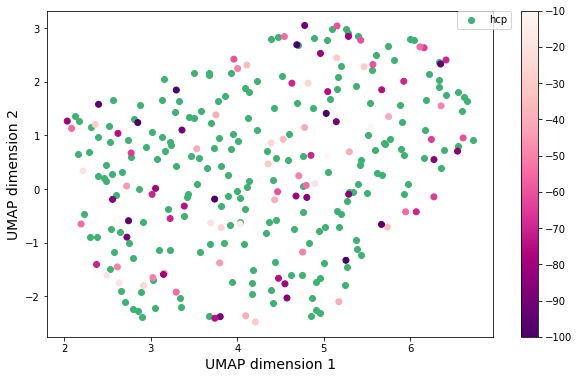

In [18]:
random.seed(a=12)

df_encoded_hcp_X = df_encoded_hcp[:200]

X_left = np.array(list(encoded_left_global['latent']))
X_hcp = np.array(list(df_encoded_hcp_X['latent']))
X_all = np.array(list(encoded_left_global['latent']) + list(df_encoded_hcp_X['latent']))

labels_left = np.array(['left_handers' for k in range(len(encoded_left_global))] + list(df_encoded_hcp_X['Group']))
reducer = umap.UMAP(random_state=0)
embedding_left = reducer.fit_transform(X_all)

arr = embedding_left
color_dict = {'hcp':'mediumseagreen', 'left_handers': 'orange'}

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()

for g in np.unique(labels_left):
    ix = np.where(labels_left == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    g_lab= f"{g}"
    if g == 'left_handers':
        t = np.array(list(encoded_left_global.handedness_score))[ix]
        ax.scatter(x, y, c=t, cmap='RdPu_r')
    else:
        ax.scatter(x, y, c = 'mediumseagreen', label = g_lab)

map1 = ax1.imshow(np.stack([t, t]),cmap='RdPu_r')
fig.colorbar(map1, ax=ax)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.xlabel(f'UMAP dimension 1', fontsize=14)
plt.ylabel(f'UMAP dimension 2', fontsize=14)
plt.show()

In [20]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [21]:
centeroid = centeroidnp(embedding_left[97:])
encoded_left_global['dist'] = [distance.euclidean(embedding_left[k], centeroid) for k in range(len(X_left))]
dist_hcp = [distance.euclidean(embedding_left[k], centeroid) for k in range(len(X_left), len(X_all))]

In [22]:
import seaborn as sns

In [33]:
min(encoded_left_global['dist'])

0.14208495647919253

/casa/home/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/casa/home/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/casa/home/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` i

<AxesSubplot:xlabel='dist', ylabel='Density'>

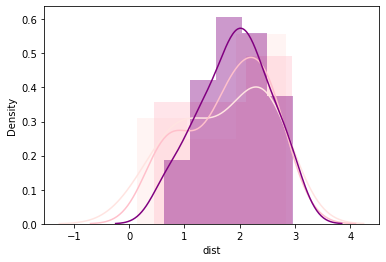

In [61]:
plt.figure()
#sns.distplot(dist_hcp[103:], color='mediumseagreen', kde=True)
sns.distplot(encoded_left_global[encoded_left_global.handedness_score>=-30]['dist'], color='mistyrose', kde=True)
sns.distplot(list(encoded_left_global[encoded_left_global.handedness_score<-30][encoded_left_global.handedness_score>-60]['dist']), color='pink', hist=True, kde=True)
#sns.distplot(list(encoded_left_global[encoded_left_global.handedness_score<-50][encoded_left_global.handedness_score>-75]['dist']), color='palevioletred', hist=False)
sns.distplot(list(encoded_left_global[encoded_left_global.handedness_score<-60]['dist']), color='purple', hist=True, kde=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(array([3., 0., 5., 0., 2., 4., 3., 7., 0., 4.]),
 array([0.63623649, 0.85924673, 1.08225697, 1.30526721, 1.52827746,
        1.7512877 , 1.97429794, 2.19730818, 2.42031843, 2.64332867,
        2.86633891]),
 <BarContainer object of 10 artists>)

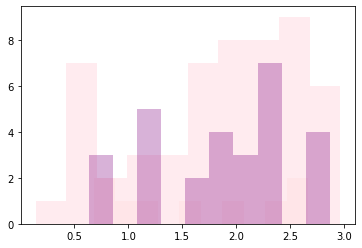

In [67]:
plt.figure()
#sns.distplot(dist_hcp[103:], color='mediumseagreen', kde=True)
plt.hist(encoded_left_global[encoded_left_global.handedness_score>=-20]['dist'], color='mistyrose',alpha=0.3)
plt.hist(list(encoded_left_global[encoded_left_global.handedness_score<-20][encoded_left_global.handedness_score>-75]['dist']), color='pink', alpha=0.3)
#sns.distplot(list(encoded_left_global[encoded_left_global.handedness_score<-50][encoded_left_global.handedness_score>-75]['dist']), color='palevioletred', hist=False)
plt.hist(list(encoded_left_global[encoded_left_global.handedness_score<-75]['dist']), color='purple',alpha=0.3)

In [57]:
F,p = ks_2samp(dist_hcp, encoded_left_global[encoded_left_global.handedness_score<-70]['dist'])
print(p)

0.3040525824824373


In [50]:
len(encoded_left_global[encoded_left_global.handedness_score>=-30]['dist'])

18

In [51]:
len(encoded_left_global[encoded_left_global.handedness_score<-30][encoded_left_global.handedness_score>-50]['dist'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


14

In [52]:
len(encoded_left_global[encoded_left_global.handedness_score<-50]['dist'])

59

(array([ 9., 16., 11., 28., 24., 34., 26., 17., 24., 11.]),
 array([0.23728093, 0.5192881 , 0.80129528, 1.08330245, 1.36530962,
        1.64731679, 1.92932396, 2.21133113, 2.49333831, 2.77534548,
        3.05735265]),
 <BarContainer object of 10 artists>)

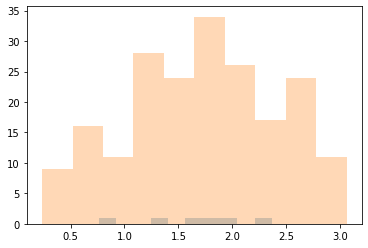

In [86]:
plt.hist(encoded_left_global[encoded_left_global.handedness_score==-100].distance, alpha=0.3)
plt.hist(dist_hcp, alpha=0.3)

In [11]:
random.seed(a=12)

df_encoded_hcp_X = df_encoded_hcp[:200]

X_left = np.array(list(df_encoded_left['latent']))
X_hcp = np.array(list(df_encoded_hcp_X['latent']))
X_all = np.array(list(df_encoded_left['latent']) + list(df_encoded_hcp_X['latent']))

labels_left = np.array(['left_handers' for k in range(len(df_encoded_left))] + list(df_encoded_hcp_X['Group']))
reducer = umap.UMAP(random_state=0)
embedding_left = reducer.fit_transform(X_all)

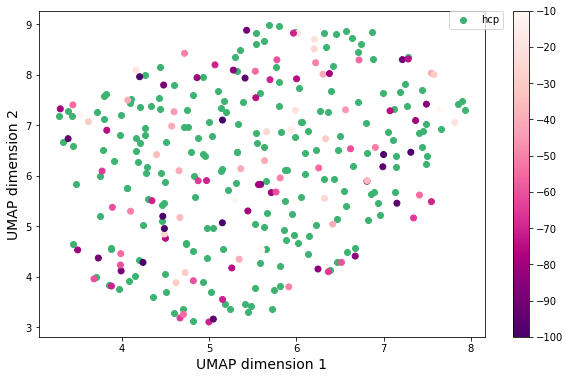

In [14]:
import matplotlib.cm as cm

arr = embedding_left
color_dict = {'hcp':'mediumseagreen', 'left_handers': 'orange'}

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()

for g in np.unique(labels_left):
    ix = np.where(labels_left == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    g_lab= f"{g}"
    if g == 'left_handers':
        t = np.array(list(left_info.handedness_score))[ix]
        ax.scatter(x, y, c=t, cmap='RdPu_r')
    else:
        ax.scatter(x, y, c = 'mediumseagreen', label = g_lab)

map1 = ax1.imshow(np.stack([t, t]),cmap='RdPu_r')
fig.colorbar(map1, ax=ax)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.xlabel(f'UMAP dimension 1', fontsize=14)
plt.ylabel(f'UMAP dimension 2', fontsize=14)
plt.show()

In [16]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [36]:
encoded_left_global = pd.merge(df_encoded_left, left_info, left_on='sub', right_on='subjects')

In [38]:
len(encoded_left_global)

97

In [25]:
from scipy.spatial import distance

dist_leftH = []
dist_hcp = []
for k in range(len(X_left)):
    dist_leftH.append(distance.euclidean(embedding_left[k], centeroid))
for k in range(len(X_left), len(X_all)):
    dist_hcp.append(distance.euclidean(embedding_left[k], centeroid))

(array([11., 14., 18., 28., 32., 24., 26., 19., 22.,  6.]),
 array([0.26990001, 0.56213824, 0.85437646, 1.14661469, 1.43885291,
        1.73109113, 2.02332936, 2.31556758, 2.60780581, 2.90004403,
        3.19228225]),
 <BarContainer object of 10 artists>)

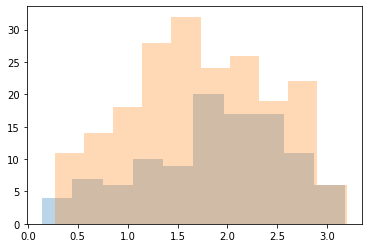

In [29]:
plt.hist(dist_leftH, alpha=0.3)
plt.hist(dist_hcp, alpha=0.3)

In [21]:
centeroid = centeroidnp(embedding_left[107:])

In [15]:
random.seed(a=12)
list_encoded_asym = random.sample(list(df_encoded_asym['sub']), 100)
df_encoded_asym_X = df_encoded_asym[df_encoded_asym['sub'].astype(int).isin(list_encoded_asym)]

list_ctrl = list(set(list(df_encoded_hcp['sub'][:200])) - set(list(df_encoded_asym_X['sub'].astype(int))))
df_encoded_hcp_X = df_encoded_hcp[df_encoded_hcp['sub'].isin(list_ctrl)]

X_asym = np.array(list(df_encoded_asym_X['latent']))
X_hcp = np.array(list(df_encoded_hcp_X['latent']))
X_left = np.array(list(df_encoded_left['latent']))
X_all = np.array(list(df_encoded_left['latent']) +list(df_encoded_hcp_X['latent']) + list(df_encoded_asym_X['latent']))

labels_asym = np.array(['left_handers' for k in range(len(df_encoded_left))] 
                            +list(df_encoded_hcp_X['Group']) + ['asymmetry' for k in range(len(df_encoded_asym_X))])
reducer = umap.UMAP(random_state=14)
embedding_all = reducer.fit_transform(X_all)

NameError: name 'df_encoded_asym' is not defined

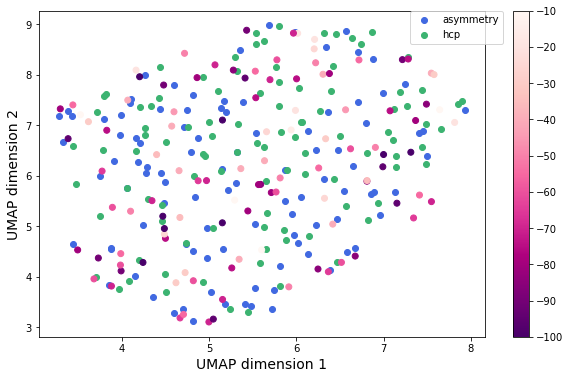

In [223]:
arr = embedding_left
color_dict = {'hcp':'mediumseagreen', 'asymmetry': 'royalblue', 'left_handers': 'orange'}

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()

for g in np.unique(labels_asym):
    ix = np.where(labels_asym == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    g_lab= f"{g}"
    if g == 'left_handers':
        pass
        t = np.array(list(left_info.handedness_score))[ix]
        ax.scatter(x, y, c=t, cmap='RdPu_r')
    else:
        ax.scatter(x, y, c = color_dict[g], label = g_lab)

map1 = ax1.imshow(np.stack([t, t]),cmap='RdPu_r')
fig.colorbar(map1, ax=ax)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.xlabel(f'UMAP dimension 1', fontsize=14)
plt.ylabel(f'UMAP dimension 2', fontsize=14)
plt.show()

In [42]:
df_encoded_left = pd.merge(df_encoded_left, left_info,
                          left_on='sub',
                          right_on='subjects')


X_left = np.array(list(df_encoded_left['latent']))
X_hcp = np.array(list(df_encoded_hcp_X['latent']))
X_all = np.array(list(df_encoded_left['latent']) + list(df_encoded_hcp_X['latent']))

labels_left = np.array(['left_handers' for k in range(len(df_encoded_left))] + list(df_encoded_hcp_X['Group']))
reducer = umap.UMAP(random_state=0)
embedding_left = reducer.fit_transform(X_all)

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.62446809 0.60310284 0.60301418 0.59450355 0.63280142 0.62429078
 0.61569149 0.61125887 0.5947695  0.59893617 0.61134752 0.60292553
 0.62012411 0.60735816 0.61985816 0.59884752 0.62402482 0.61569149
 0.61560284 0.61985816 0.63253546 0.63661348 0.62810284 0.62828014
 0.6072695  0.61170213 0.60744681 0.61152482 0.59875887 0.63679078
 0.63262411 0.61161348        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.62446809 0.60735816
 0.60301418 0.59450355 0.63280142 0.62429078 0.61569149 0.61125887
 0.5947695  0.60310284 0.61134752 0.59867021 0.620

>acc=0.517, est=0.641, cfg={'criterion': 'mse', 'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 75}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.64113475 0.63253546 0.62411348 0.60283688 0.66223404 0.64539007
 0.61569149 0.60744681 0.6197695  0.60310284 0.59893617 0.58617021
 0.6412234  0.64113475 0.6285461  0.59060284 0.58608156 0.59902482
 0.5947695  0.58617021 0.60319149 0.60753546 0.59060284 0.57375887
 0.59468085 0.59893617 0.62836879 0.60292553 0.60292553 0.61143617
 0.59042553 0.60744681        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.63687943 0.64512411
 0.64095745 0.61125887 0.65381206 0.6412234  0.60735816 0.60744681
 0.6197695  0.60310284 0.59893617 0.59042553 0.632

>acc=0.633, est=0.662, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.63457447 0.61338652 0.61338652 0.60939716 0.65549645 0.64689716
 0.63847518 0.62180851 0.63874113 0.63439716 0.63448582 0.63874113
 0.63900709 0.61338652 0.6304078  0.63466312 0.58413121 0.60097518
 0.6052305  0.58829787 0.59255319 0.60930851 0.58404255 0.62198582
 0.6052305  0.62588652 0.60505319 0.60514184 0.61329787 0.6177305
 0.62198582 0.60957447        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.63874113 0.61338652
 0.61338652 0.60939716 0.65124113 0.65106383 0.63847518 0.62180851
 0.63874113 0.6302305  0.63448582 0.63882979 0.6390

>acc=0.627, est=0.655, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.62588652 0.60487589 0.60904255 0.59654255 0.61312057 0.59228723
 0.61329787 0.60505319 0.61338652 0.60913121 0.5964539  0.59246454
 0.61356383 0.63014184 0.61737589 0.60921986 0.59636525 0.58386525
 0.58785461 0.60496454 0.61329787 0.59663121 0.61338652 0.59219858
 0.59654255 0.57562057 0.56719858 0.57978723 0.60514184 0.58430851
 0.60514184 0.59255319        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.63014184 0.60487589
 0.60904255 0.59654255 0.61312057 0.59228723 0.61329787 0.60505319
 0.61764184 0.61347518 0.60079787 0.59671986 0.613

>acc=0.525, est=0.630, cfg={'criterion': 'mse', 'learning_rate': 0.05, 'loss': 'deviance', 'n_estimators': 50}


/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py", line 215, in _fit_stage
    check_input=False)
  File "/casa/home/.local/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "/casa/home/.local/lib/pyt

/casa/home/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.64255319 0.64255319 0.62606383 0.61356383 0.63439716 0.62615248
 0.59689716 0.61374113 0.61764184 0.59654255 0.60921986 0.60496454
 0.64707447 0.62189716 0.63031915 0.61347518 0.59202128 0.59654255
 0.58812057 0.59219858 0.62180851 0.62597518 0.62163121 0.61728723
 0.61728723 0.60478723 0.60478723 0.60886525 0.6089539  0.59663121
 0.59237589 0.60070922        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.63838652 0.63413121
 0.62606383 0.61356383 0.63439716 0.62615248 0.60106383 0.61374113
 0.62180851 0.60079787 0.60505319 0.60921986 0.647

>acc=0.627, est=0.647, cfg={'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}


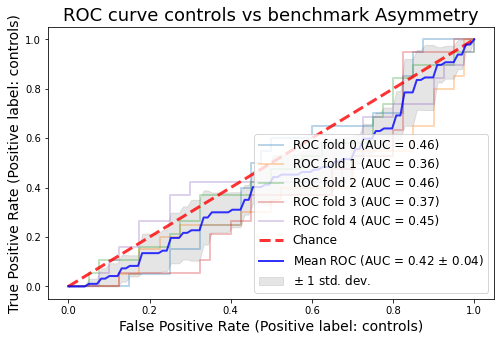

Accuracy: 0.586 (0.053)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_all, labels_left, test_size=0.4, stratify=labels_left, random_state=42)

fig, ax = plt.subplots(figsize=(8, 5))

cv_outer = StratifiedKFold(n_splits=5)

outer_results = list()
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
i = 0

for train_ix, test_ix in cv_outer.split(X_all, labels_left):
    X_train, X_test = X_all[train_ix, :], X_all[test_ix, :]
    y_train, y_test = labels_left[train_ix], labels_left[test_ix]
    cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    model = GradientBoostingClassifier(random_state=1)
    space = dict()
    space['loss'] = ['deviance', 'exponential']
    space['learning_rate'] = [0.05, 0.1, 0.2, 0.25]
    space['n_estimators'] = [50, 75, 100, 150]
    space['criterion'] = ['friedman_mse', 'squared_error', 'mse']
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = metrics.accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
        
    viz = metrics.plot_roc_curve(best_model, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=2, ax=ax)
    i += 1 
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve ")
ax.legend(loc="lower right", fontsize='large')
plt.xlabel('False Positive Rate (Positive label: controls)', fontsize=14)
plt.ylabel('True Positive Rate (Positive label: controls)', fontsize=14)
plt.title('ROC curve controls vs benchmark Asymmetry', fontsize=18)
plt.show()
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

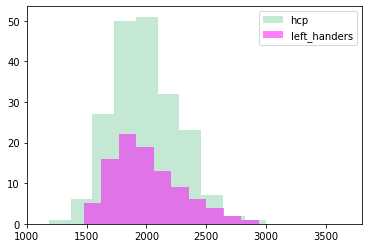

In [38]:
plt.subplot()
plt.xlim([1000, 3800])
plt.hist(df_encoded_hcp_X.loss, color='mediumseagreen', alpha=0.3, label='hcp')
plt.hist(df_encoded_left.loss, color='magenta', alpha=0.5, label='left_handers')
plt.legend()